In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# Background
Objective is to investigate issues that will inform an approach for aggregating HMS smoke data to fips and daily level in a reproducible way.

This notebook reviews a dataset of HMS smoke data collected from https://satepsanone.nesdis.noaa.gov/pub/FIRE/web/HMS/Smoke_Polygons/Shapefile/ using code/1_collect_HMS_daily_shapes.py. This dataset underwent the following alterations:
* addition of a "crs" column, where the script recorded the crs value associated with each day's shapefile as a string.
* addition of "year" and "date" columns, with values as strings to enable saving as a shapefile.
* addition of columns for days which previously did not have those columns. That is, where 2005-08-05 previously had no Density column, it now has a Density column with NA values. This is the result of concatenating all daily dataframes.

Notebook 2 explores issues related to shape and time overlap.

## Load data

In [2]:
# load data
f = "../data/hms_smoke_shapes_2005_2021/hms_smoke_shapes_20050805_20211231.shp"
df = gpd.read_file(f)
df

,ID,Start,End,date,year,Density,Satellite,altitudeMo,tessellate,extrude,visibility,geometry
0,0.0,1200,1700,2005-08-05 00:00:00,2005,NaN,None,None,NaN,NaN,NaN,"POLYGON ((-121.32000 50.35000, -121.46800 50.4..."
1,1.0,1200,1700,2005-08-05 00:00:00,2005,NaN,None,None,NaN,NaN,NaN,"POLYGON ((-114.67300 47.09400, -114.75200 47.0..."
2,2.0,1200,1700,2005-08-05 00:00:00,2005,NaN,None,None,NaN,NaN,NaN,"POLYGON ((-114.25200 46.02700, -114.30100 46.1..."
3,3.0,1145,1715,2005-08-05 00:00:00,2005,NaN,None,None,NaN,NaN,NaN,"POLYGON ((-78.78100 37.51000, -78.74600 37.500..."
4,4.0,1645,1945,2005-08-05 00:00:00,2005,NaN,None,None,NaN,NaN,NaN,"POLYGON ((-123.90500 42.73000, -123.95400 42.6..."
...,...,...,...,...,...,...,...,...,...,...,...,...
439746,NaN,2021365 1100,2021365 1600,2021-12-31 00:00:00,2021,5.0,GOES-EAST,None,NaN,NaN,NaN,"POLYGON ((-92.22419 19.55040, -92.41493 19.681..."
439747,NaN,2022365 1940,2022365 2330,2021-12-31 00:00:00,2021,5.0,GOES-EAST,None,NaN,NaN,NaN,"POLYGON ((-95.21035 16.88020, -95.75144 17.073..."
439748,NaN,2022365 1940,2022365 2330,2021-12-31 00:00:00,2021,5.0,GOES-EAST,None,NaN,NaN,NaN,"POLYGON ((-103.78492 20.64871, -103.67599 20.7..."
439749,NaN,2022365 1940,2022365 2330,2021-12-31 00:00:00,2021,5.0,GOES-EAST,None,NaN,NaN,NaN,"POLYGON ((-102.01601 20.38415, -102.00044 20.4..."


# Question 1: Do smoke plumes from the same day and time overlap?

Need to determine what kind of overlaps exist and what the causes are.

**Notes:**
- Shapes with denser shapes appear likely to be inside less dense shapes.
    - Both medium-density shapes from the same time series were inside low-density shapes. Dense smoke shapes inside less dense smoke shapes also intuitively make sense, as ensuring otherwise would involve cutting holes in the low-density shapes.
- Intersection of shapes in the same time series with the same density does occur.

Let's take a given day and look at the spatial and temporal overlap of the shapes recorded.

Here are all the plumes for August 11, 2016:

In [3]:
df_aug11 = df.loc[df.date.str.contains("2016-08-11")].copy()

df_aug11

,ID,Start,End,date,year,Density,Satellite,altitudeMo,tessellate,extrude,visibility,geometry
249794,0.0,1130,1500,2016-08-11 00:00:00,2016,5.0,None,None,NaN,NaN,NaN,"POLYGON ((-109.69300 44.87500, -109.51400 45.7..."
249795,1.0,1300,1500,2016-08-11 00:00:00,2016,5.0,None,None,NaN,NaN,NaN,"POLYGON ((-114.05500 37.82300, -113.58100 38.0..."
249796,2.0,1330,1500,2016-08-11 00:00:00,2016,5.0,None,None,NaN,NaN,NaN,"POLYGON ((-115.67500 44.11300, -115.62500 44.1..."
249797,3.0,1400,1500,2016-08-11 00:00:00,2016,5.0,None,None,NaN,NaN,NaN,"POLYGON ((-118.36900 44.40600, -118.29500 44.4..."
249798,4.0,1400,1500,2016-08-11 00:00:00,2016,5.0,None,None,NaN,NaN,NaN,"POLYGON ((-119.14800 37.87600, -119.02900 37.8..."
249799,5.0,2215,2345,2016-08-11 00:00:00,2016,5.0,None,None,NaN,NaN,NaN,"POLYGON ((-121.74400 36.21700, -121.85900 36.3..."
249800,6.0,2215,2345,2016-08-11 00:00:00,2016,5.0,None,None,NaN,NaN,NaN,"POLYGON ((-118.40400 44.43200, -118.21200 44.4..."
249801,7.0,2215,2345,2016-08-11 00:00:00,2016,5.0,None,None,NaN,NaN,NaN,"POLYGON ((-115.88800 43.99100, -115.76000 44.1..."
249802,8.0,2215,2345,2016-08-11 00:00:00,2016,16.0,None,None,NaN,NaN,NaN,"POLYGON ((-115.78400 44.03200, -115.66300 44.1..."
249803,9.0,2245,0015,2016-08-11 00:00:00,2016,5.0,None,None,NaN,NaN,NaN,"POLYGON ((-117.27700 34.33900, -117.27600 34.4..."


Plotting the shapes with .2 translucence shows overlaps.

<AxesSubplot:>

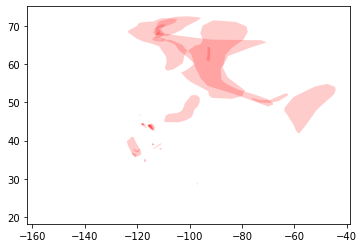

In [4]:
df_aug11.plot(color="red", alpha=0.2)

This is for a full day, though. What about for data with the same start and end times?

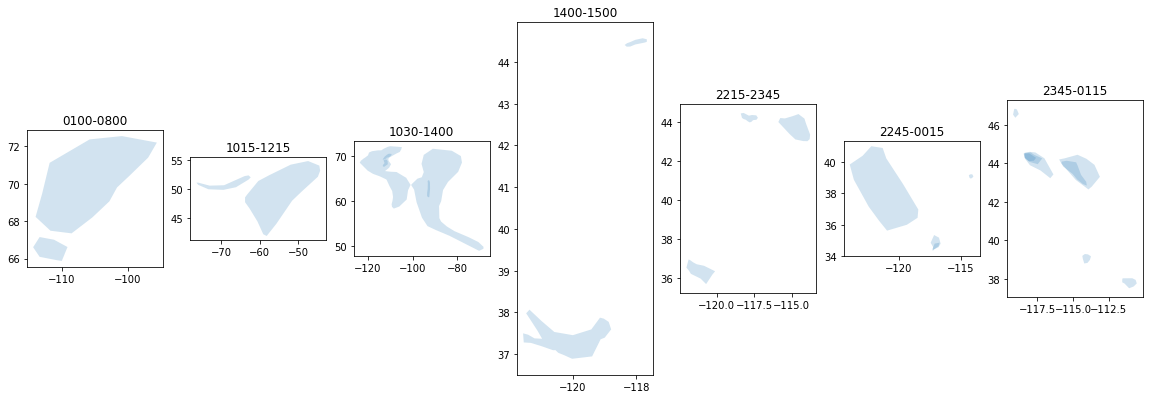

In [5]:
df_aug11_times = df_aug11.loc[df_aug11.duplicated(subset=["Start","End","date","Density"], keep=False)].sort_values(["date","Start","End"]).copy()
aug11_groups = df_aug11_times.groupby(["Start", "End","date"])
plt.rcParams['figure.figsize'] = [20, 10]

for i in range(aug11_groups.ngroups):
    # create subplot axes in a 3x3 grid
    ax = plt.subplot(1, aug11_groups.ngroups, i + 1) # nrows, ncols, axes position
    group_df = aug11_groups.get_group((list(aug11_groups.groups)[i]))
    group_df.plot(alpha=0.2, ax=ax, figsize=(10,10))
    ax.set_title(f"{group_df.iloc[0]['Start']}-{group_df.iloc[0]['End']}")

plt.show()

Groups 1030, 2245, and 2345 have some overlap. This may be the result of differences in shape density values.

Let's plot those three groups while grouping by density:

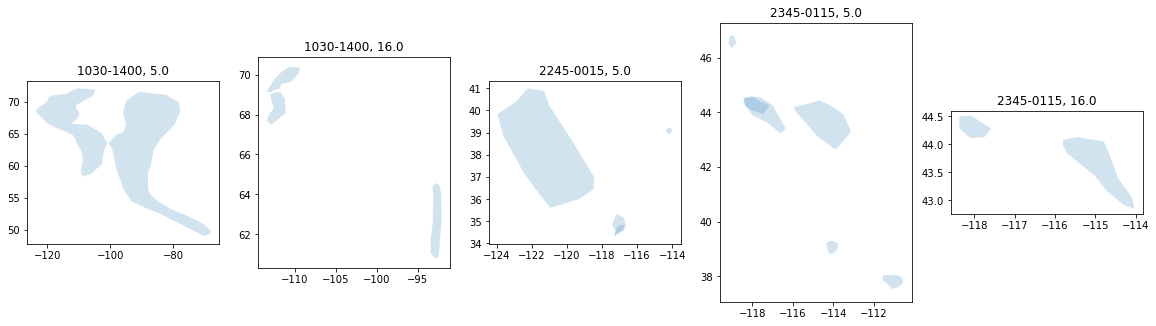

In [6]:
aug11_groups = df_aug11_times.loc[df_aug11_times.Start.isin(["1030","2245","2345"])].groupby(["Start","End","date","Density"])


for i in range(aug11_groups.ngroups):
    # create subplot axes in a 3x3 grid
    ax = plt.subplot(1, aug11_groups.ngroups, i + 1) # nrows, ncols, axes position
    group_df = aug11_groups.get_group((list(aug11_groups.groups)[i]))
    group_df.plot(alpha=0.2, ax=ax, figsize=(10,10))
    ax.set_title(f"{group_df.iloc[0]['Start']}-{group_df.iloc[0]['End']}, {group_df.iloc[0]['Density']}")

plt.show()

In 2245 5.0 and 2345 5.0, medium-density shapes were often inside larger low-density shapes. We can also still see clear overlaps of low-density clouds which share the same date, Start, and End values.